In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import math

I queried the data from the database separately for years 2014, 2015 and 2016. Some lines were of the wrong length and after inspecting them in the text editor I decided to drop them. 

In [5]:
data = pd.read_csv('/Users/tetyanadzhula/DSI-NYC-4/projects/capstone/assets/capstone2014R.csv', encoding = 'utf-8', error_bad_lines=False)
data['year'] = 2014
len(data)

3581

In [6]:
data2 = pd.read_csv('/Users/tetyanadzhula/DSI-NYC-4/projects/capstone/assets/capstone2015R.csv', encoding = 'utf-8', error_bad_lines=False)
data2['year']=2015
len(data2)

76706

In [7]:
data3 = pd.read_csv('/Users/tetyanadzhula/DSI-NYC-4/projects/capstone/assets/capstone2016R.csv', encoding = 'utf-8', error_bad_lines=False)
data3['year']=2016
len(data3)

40855

In [8]:
data_df = pd.concat([data, data2, data3])
len(data_df)

121142

In [9]:
data_df.reset_index(drop = True, inplace=True)

In [14]:
# data_df.to_csv('data_df.csv', encoding='utf-8')
# data_df.to_csv('another_data_df.csv', encoding='utf-8')
df = pd.read_csv("/Users/tetyanadzhula/DSI-NYC-4/projects/capstone/assets/another_data_df.csv", )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121142 entries, 0 to 121141
Data columns (total 15 columns):
title            121076 non-null object
author           16162 non-null object
publisher_url    121136 non-null object
pub_week         121135 non-null object
pub_day          121134 non-null object
pub_month        121125 non-null object
social_fb        121125 non-null object
social_tw        121124 non-null float64
impact_score     121124 non-null object
topic_name       121124 non-null object
hq_city          121013 non-null object
hq_country       121116 non-null object
is_ukr_press     121115 non-null object
editor           102345 non-null object
year             121142 non-null int64
dtypes: float64(1), int64(1), object(13)
memory usage: 13.9+ MB


In [16]:
df[df['year'] ==2015].head(10)

,title,author,publisher_url,pub_week,pub_day,pub_month,social_fb,social_tw,impact_score,topic_name,hq_city,hq_country,is_ukr_press,editor,year
3581,<b>Putin</b> Digs Obama With New Year&#39;s Ev...,NaN,weaselzippers.us,2015-00,2015-01-01,2015-01,3.0,14.0,17,Інше,Unknown,Unknown,0,sergep,2015
3582,"In New Year&#39;s address, <b>Putin</b> thanks...",NaN,washingtonpost.com,2015-00,2015-01-01,2015-01,23.0,6.0,29,Українські міжнародні відносини,"Washington, DC",USA,0,sergep,2015
3583,Thousands of Russian protesters in Moscow: &qu...,NaN,thespeaker.co,2015-00,2015-01-01,2015-01,193.0,14.0,207,Protest in Moscow agains Putin and war in Ukraine,Unknown,Unknown,0,mariana.getman,2015
3584,Ukraine War - [BATTLE FOOTAGE] &#39;Abkhazian ...,NaN,youtube.com,2015-00,2015-01-01,2015-01,6.0,0.0,6,Бойові дії на Сході України,San Francisco,USA,0,sergep,2015
3585,<b>Ukraine</b> Faces Full-Scale Financial Cris...,NaN,valuewalk.com,2015-00,2015-01-01,2015-01,31.0,13.0,44,Українська економіка,New York,USA,0,Tonia.Keefer,2015
3586,Vladimir <b>Putin</b> Extends Olive Branch of ...,NaN,thehigherlearning.com,2015-00,2015-01-01,2015-01,27.0,2.0,29,Українські міжнародні відносини,Unknown,Unknown,0,sergep,2015
3587,Anti-<b>Putin</b> Protest Fizzles as Police Sw...,NaN,nytimes.com,2015-00,2015-01-01,2015-01,193.0,258.0,451,Не має відношення до України,New York,USA,0,Tonia.Keefer,2015
3588,UN starts humanitarian campaign for displaced ...,NaN,thehindu.com,2015-00,2015-01-01,2015-01,4.0,8.0,12,Humanitarian aid for displayed in Ukraine,Tami Nadu,India,0,Tonia.Keefer,2015
3589,The downing of Malaysia Airlines <b>MH17</b> ...,NaN,theaimn.com,2015-00,2015-01-01,2015-01,73.0,7.0,80,MH-17 crash,Unknown,Unknown,0,gekkarp,2015
3590,The war in <b>Novorossia</b> Online 12.31.2014...,NaN,en.voicesevas.ru,2015-00,2015-01-01,2015-01,6.0,1.0,7,Fighting in Eastern Ukraine,Unknown,Unknown,0,sergep,2015


In [17]:
all_topics = df['topic_name'].value_counts()
len(all_topics)

907

There's more than 20 categories - the annotators were assigning topics outside of our specified categories. I will be reassigning the labels for these articles and putting them back into the dataset.

# Pub_week

In [18]:
len(df[df['pub_week'] == '0'])

10

In [19]:
df.drop([1332, 1358, 1396, 1510, 1609, 1936, 2047, 59799, 67435,73333, 118399, 1413, 115327], inplace=True)

# Media

In [20]:
df.ix[df['publisher_url'] == 'www.kyivpost.com', ['publisher_url']] = 'kyivpost.com'
df.ix[df['publisher_url'] == 'www.dailymail.co.uk', ['publisher_url']] = 'dailymail.co.uk'
df.ix[df['publisher_url'] == 'www.nytimes.com', ['publisher_url']] = 'nytimes.com'
df.ix[df['publisher_url'] == 'www.rt.com', ['publisher_url']] = 'rt.com'
df.ix[df['publisher_url'] == 'www.reuters.com', ['publisher_url']] = 'reuters.com'
df.ix[df['publisher_url'] == 'www.rferl.org', ['publisher_url']] = 'rferl.org'

df.ix[df['publisher_url'] == 'www.themoscowtimes.com', ['publisher_url']] = 'themoscowtimes.com'
df.ix[df['publisher_url'] == 'www.theguardian.com', ['publisher_url']] = 'theguardian.com'
df.ix[df['publisher_url'] == 'www.bbc.co.uk', ['publisher_url']] = 'bbc.co.uk'
df.ix[df['publisher_url'] == 'www.bloomberg.com',  ['publisher_url']] = 'bloomberg.com'

In [21]:
df['publisher_url'].value_counts().head(10)

kyivpost.com          7300
uatoday.tv            4847
sputniknews.com       4663
en.interfax.com.ua    4390
rferl.org             1922
reuters.com           1892
news.yahoo.com        1889
rt.com                1782
tass.ru               1644
dailymail.co.uk       1394
Name: publisher_url, dtype: int64

# Publication date

In [22]:
df['month'] = pd.to_datetime(df['pub_day']).dt.month
df['week'] = pd.to_datetime(df['pub_day']).dt.week
df['date'] = pd.to_datetime(df['pub_day']).dt.day 

Categories before cleaning

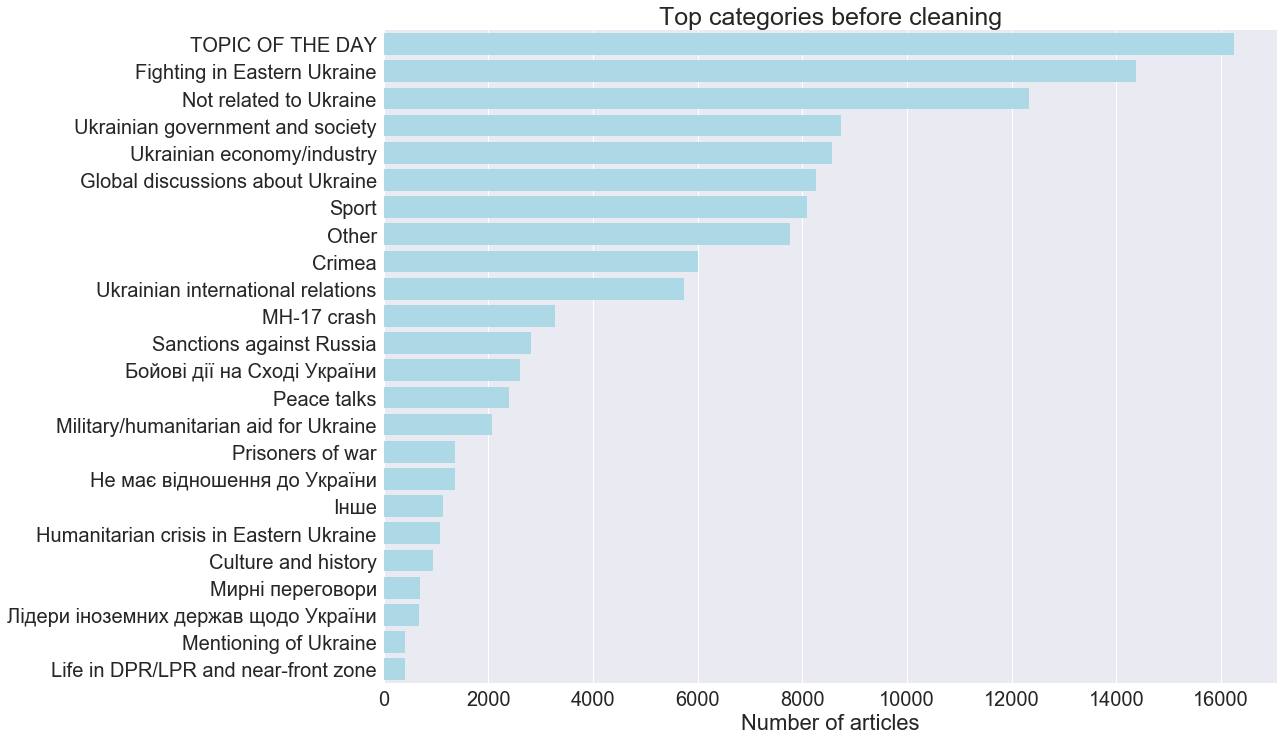

In [23]:
import seaborn as sns
topics = df['topic_name'].value_counts().head(24).to_frame()
topics = topics.reset_index()
topics.columns = ['topic', 'number_of_publications']

topics['topic'] = [line.strip() for line in topics['topic']]
topics['topic'] = [line.decode('utf-8').strip() for line in topics['topic'] ]


plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = sns.barplot(x="number_of_publications", y="topic", color ='lightblue', data=topics, saturation=2)
ax.set_title('Top categories before cleaning', fontsize = 25)
ax.set(xlabel='Number of articles', ylabel='')
plt.show()

# Cleaning categories

In the beginning of the project there was no unified list of categories, the annotators were assigning topics to the articles in their own words. Right now there is a list with 20 categories and the annotators must choose one that’s most accurately conveys the topic of the article. I reassigned the topics for the articles that were annotated before a list of categories was initiated. 

In [24]:
categories = ['Crimea', 'Culture and history', 'Fighting in Eastern Ukraine', 'Global discussions about Ukraine',\
              'Humanitarian crisis in Eastern Ukraine', 'Life in DPR/LPR and near-front zone', 'Mentioning of Ukraine',\
              'MH-17 crash',  'Military/humanitarian aid for Ukraine', 'Not related to Ukraine', 'Other', 'Peace talks',\
              'Prisoners of war', 'Sanctions against Russia', 'Sport', 'Ukrainian economy/industry', \
              'Ukrainian government and society', 'Ukrainian international relations', 'Emergencies in Ukraine',\
             'Russian “humanitarian” aid']


In [25]:
df.ix[df['topic_name'] == 'Nuke', ['topic_name']] = 'Emergencies in Ukraine'
df.ix[df['topic_name'] == 'Russia invaded Ukraine', ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == 'Russia invades Ukraine', ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == 'Crisis in Eastern Ukraine', ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == 'Russian invasion in Ukraine', ['topic_name']] = 'Emergencies in Ukraine'
df.ix[df['topic_name'] == 'Miss Universe', ['topic_name']] = 'Other'
df.ix[df['topic_name'] == 'Weapons to Ukraine', ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[df['topic_name'] == 'Weapons', ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[df['topic_name'] == '#USA military aid to Ukraine', ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[df['topic_name'] == 'NOT ABOUT UKRAINE', ['topic_name']] = 'Not related to Ukraine'
df.ix[df['topic_name'] == "Putin's state of nation address", ['topic_name']] = 'Global discussions about Ukraine'
df.ix[df['topic_name'] == 'Nothing about Ukraine', ['topic_name']] = 'Not related to Ukraine'
df.ix[df['topic_name'] == 'Зброя', ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[df['topic_name'] == 'G20 summit', ['topic_name']] = 'G-20 summit'
df.ix[df['topic_name'] == 'Crisis in Ukraine', ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == 'Conflict in Eastern Ukraine', ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == "Russia's military aggression", ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == 'Volnovakha Tragedy', ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == 'nuclear accident', ['topic_name']] = 'Emergencies in Ukraine'
df.ix[df['topic_name'] == 'Military aid to Ukraine', ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[df['topic_name'] == 'Бойові дії на Сході України; Лідери іноземних держав щодо України', ['topic_name']] = 'Global discussions about Ukraine'
df.ix[df['topic_name'] == "Ukrainian economy. Ukraine's gold reserves.", ['topic_name']] = 'Ukrainian economy/industry'
df.ix[df['topic_name'] == 'US approves the bill that grants Ukraine lethal aid', ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[df['topic_name'] == 'Yanukovych', ['topic_name']] = 'Ukrainian government and society'
df.ix[df['topic_name'] == 'Maidan', ['topic_name']] = 'Ukrainian government and society'
df.ix[df['topic_name'] == 'Explosion In Donetsk', ['topic_name']] = 'Emergencies in Ukraine'
df.ix[df['topic_name'] == 'Ukraine - NATO', ['topic_name']] = 'NATO'
df.ix[df['topic_name'] == 'Україна-НАТО', ['topic_name']] = 'NATO'
df.ix[df['topic_name'] == 'Nuclear plant', ['topic_name']] = 'Emergencies in Ukraine'
df.ix[df['topic_name'] == 'russian troops in Ukraine', ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == 'Ukraine - international relations', ['topic_name']] = 'Ukrainian international relations'
df.ix[df['topic_name'] == "Ukraine's coal reserves low", ['topic_name']] = 'Ukrainian economy/industry'
df.ix[df['topic_name'] == 'Russia could face further sanctions \nRussian action in Ukraine is unacceptable.', ['topic_name']] = 'Sanctions against Russia'
df.ix[df['topic_name'] == 'Russia Army', ['topic_name']] = 'Fighting in Eastern Ukraine'

In [26]:
df.loc[1448, ['topic_name']] = 'Peace talks'
df.loc[1569, ['topic_name']] = 'Global discussions about Ukraine'
df.loc[1600, ['topic_name']] = 'Global discussions about Ukraine'
df.loc[1621, ['topic_name']] = 'Peace talks'
df.loc[1820, ['topic_name']] = 'Global discussions about Ukraine'
df.loc[1866, ['topic_name']] = 'Life in DPR/LPR and near-front zone'
df.loc[1874, ['topic_name']] = 'Life in DPR/LPR and near-front zone'

In [27]:
df.ix[df['topic_name'] == 'Бойові дії на Сході України', ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[df['topic_name'] == 'Не має відношення до України', ['topic_name']] = 'Not related to Ukraine'
df.ix[df['topic_name'] == 'Інше', ['topic_name']] = 'Other'
df.ix[df['topic_name'] == 'Мирні переговори', ['topic_name']] = 'Peace talks'
df.ix[df['topic_name'] == 'Лідери іноземних держав щодо України', ['topic_name']] = 'Global discussions about Ukraine'
df.ix[df['topic_name'] == 'Українські міжнародні відносини', ['topic_name']] = 'Ukrainian international relations'
df.ix[df['topic_name'] == 'Крим', ['topic_name']] = 'Crimea'
df.ix[df['topic_name'] == 'Українська економіка', ['topic_name']] = 'Ukrainian economy/industry'
df.ix[df['topic_name'] == 'Weapon for Ukraine', ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[df['topic_name'] == 'Економічні санкції проти Росії', ['topic_name']] = 'Sanctions against Russia'
df.ix[df['topic_name'] == 'Російський гуманітарний" конвой"', ['topic_name']] = 'Russian “humanitarian” aid'
df.ix[df['topic_name'] == 'Ukrainian economy', ['topic_name']] = 'Ukrainian economy/industry'
df.ix[df['topic_name'] == 'Weapons for Ukraine', ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[df['topic_name'] == 'Енергетика України', ['topic_name']] = 'Ukrainian economy/industry'
df.ix[df['topic_name'] == 'нато', ['topic_name']] = 'Global discussions about Ukraine'
df.ix[df['topic_name'] == 'Nadiya Savchenko', ['topic_name']] = 'Prisoners of war'
df.ix[df['topic_name'] == 'Ukrainian industry', ['topic_name']] = 'Ukrainian economy/industry'
df.ix[df['topic_name'] == 'About Savchenko', ['topic_name']] = 'Prisoners of war'
df.ix[df['topic_name'] == 'Nadiya Savchenko', ['topic_name']] = 'Prisoners of war'

For my analysis I also need to go through each day that had articles in “TOPIC OF THE DAY” and convert them to the actual name of the category.

In [28]:
df.ix[(df['pub_day'] == '2015-02-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-02-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-02-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-02-20') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-02-21') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2015-02-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-02-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-02-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[(df['pub_day'] == '2015-02-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[(df['pub_day'] == '2015-02-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-02-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-03-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-02-28') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-03-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-03-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-03-04') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2015-03-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[(df['pub_day'] == '2015-03-12') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-03-13') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-03-14') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-03-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-03-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-03-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-03-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-03-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-03-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-03-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-04-07') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-04-08') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-04-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-04-13') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Peace talks'
df.ix[(df['pub_day'] == '2015-04-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-04-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-04-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'

In [29]:
df.ix[(df['pub_day'] == '2015-04-20') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Military/humanitarian aid for Ukraine'
df.ix[(df['pub_day'] == '2015-04-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-04-29') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2015-05-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-05-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-05-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-05-08') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-05-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-05-12') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'

In [30]:
df.ix[(df['pub_day'] == '2015-05-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2015-05-30') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-06-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2015-06-11') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-06-14') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-06-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-06-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-06-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-06-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sanctions against Russia'
df.ix[(df['pub_day'] == '2015-06-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sanctions against Russia'
df.ix[(df['pub_day'] == '2015-06-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-06-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-06-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-06-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-06-29') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-07-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-07-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'MH-17 crash'
df.ix[(df['pub_day'] == '2015-07-11') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'MH-17 crash'
df.ix[(df['pub_day'] == '2015-07-13') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-07-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-07-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-07-29') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'MH-17 crash'
df.ix[(df['pub_day'] == '2015-07-30') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2015-07-31') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-08-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-08-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-08-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-08-19') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-08-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-08-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-08-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-08-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2015-08-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-08-29') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-08-31') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-09-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'



In [31]:
df.ix[(df['pub_day'] == '2015-09-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2015-09-04') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-09-05') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Peace talks'
df.ix[(df['pub_day'] == '2015-09-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-09-10') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2015-09-12') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Peace talks'
df.ix[(df['pub_day'] == '2015-09-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2015-09-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-09-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-09-19') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-09-20') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-09-21') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-09-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2015-09-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-09-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-09-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sanctions against Russia'
df.ix[(df['pub_day'] == '2015-09-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-09-28') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-09-29') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2015-09-30') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2015-10-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Peace talks'
df.ix[(df['pub_day'] == '2015-10-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Peace talks'

In [32]:
df.ix[(df['pub_day'] == '2015-10-05') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Peace talks'
df.ix[(df['pub_day'] == '2015-10-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Life in DPR/LPR and near-front zone'
df.ix[(df['pub_day'] == '2015-10-13') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'MH-17 crash'
df.ix[(df['pub_day'] == '2015-10-14') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'MH-17 crash'
df.ix[(df['pub_day'] == '2015-10-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2015-10-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2015-10-20') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2015-10-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2015-10-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sanctions against Russia'
df.ix[(df['pub_day'] == '2015-10-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-10-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Other'
df.ix[(df['pub_day'] == '2015-10-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Other'
df.ix[(df['pub_day'] == '2015-10-30') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2015-11-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-11-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2015-11-04') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2015-11-07') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Culture and history'
df.ix[(df['pub_day'] == '2015-11-11') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2015-11-12') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-11-14') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2015-11-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-11-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2015-11-21') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-11-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-11-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-11-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-11-28') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-12-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2015-12-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2015-12-07') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2015-12-08') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2015-12-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-12-11') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2015-12-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-12-19') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-12-20') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-12-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sanctions against Russia'
df.ix[(df['pub_day'] == '2015-12-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sanctions against Russia'
df.ix[(df['pub_day'] == '2015-12-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2015-12-31') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-01-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-01-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-01-05') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2016-01-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-01-08') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2016-01-14') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-01-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2016-01-21') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-01-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-01-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-01-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-01-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-01-29') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-02-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-02-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-02-04') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-02-05') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-02-10') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2016-02-13') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-02-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian economy/industry'
df.ix[(df['pub_day'] == '2016-02-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-02-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-02-19') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Humanitarian crisis in Eastern Ukraine'
df.ix[(df['pub_day'] == '2016-02-20') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-02-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-02-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2016-02-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-03-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-07') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-08') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-10') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-03-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-03-21') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-03-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2016-03-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-03-28') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-04-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2016-04-04') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-04-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2016-04-07') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2016-04-10') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-04-14') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-04-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-04-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2016-04-19') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-04-20') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-04-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-04-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-04-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-04-30') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2016-05-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2016-05-13') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-05-14') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-05-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-05-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-05-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-05-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-05-21') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-05-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-05-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2016-05-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-05-26') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Prisoners of war'
df.ix[(df['pub_day'] == '2016-05-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-05-29') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2016-06-04') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-06-12') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-06-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-06-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sanctions against Russia'
df.ix[(df['pub_day'] == '2016-07-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2016-07-07') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-07-08') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-07-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-07-11') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2016-07-12') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2016-07-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'

In [33]:
df.ix[(df['pub_day'] == '2016-07-20') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-07-21') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-07-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2016-07-31') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2016-08-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-08-10') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-08-11') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-08-12') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-08-13') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2016-08-14') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-19') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-08-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2016-09-06') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-09-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Sport'
df.ix[(df['pub_day'] == '2016-09-18') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2016-09-28') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'MH-17 crash'
df.ix[(df['pub_day'] == '2016-09-29') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-10-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Peace talks'
df.ix[(df['pub_day'] == '2016-10-02') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'MH-17 crash'
df.ix[(df['pub_day'] == '2016-10-17') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Peace talks'
df.ix[(df['pub_day'] == '2016-10-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Global discussions about Ukraine'
df.ix[(df['pub_day'] == '2016-10-31') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-11-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-11-03') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2016-11-07') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-11-09') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Mentioning of Ukraine'
df.ix[(df['pub_day'] == '2016-11-15') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-11-22') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-11-23') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-11-24') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian international relations'
df.ix[(df['pub_day'] == '2016-11-25') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-12-01') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Crimea'
df.ix[(df['pub_day'] == '2015-02-16') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Fighting in Eastern Ukraine'
df.ix[(df['pub_day'] == '2015-03-05') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Emergencies in Ukraine'
df.ix[(df['pub_day'] == '2015-03-27') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'
df.ix[(df['pub_day'] == '2016-11-08') & (df['topic_name']=='TOPIC OF THE DAY'), ['topic_name']] = 'Ukrainian government and society'

In [34]:
len(df.ix[df['topic_name']=='TOPIC OF THE DAY'])

1378

After having inspected the remaining articles with "TOPIC OF THE DAY" I decide to drop them - they look like articles with incorrectly assigned category and would take a lot of time to correct.

In [35]:
df['topic_name'] = df['topic_name'].apply(lambda x: x if x in categories else 'DROP')
df = df[df['topic_name']!= "DROP"]  

Also, for the dates below, it seems like the system malfunctioned and put all articles of that day in the same category. 
Annotating articles takes time and I already have enough data, so I decide to drop these as well.

In [36]:
dates_to_drop = ['2015-02-20', '2015-05-10', '2015-05-14', '2015-05-16',\
                '2015-05-17', '2015-05-18', '2015-05-19', '2015-05-20', \
                '2015-05-21', '2015-05-24', '2015-05-27', '2015-05-28', \
                '2015-05-29', '2015-05-31', '2015-06-01', '2015-06-02', \
                '2015-06-02', '2015-06-03', '2015-06-04', '2015-06-05', \
                '2015-06-06', '2015-06-07', '2015-06-08', '2015-07-08', \
                '2015-07-09', '2015-07-09', '2015-07-10', '2015-07-12', \
                '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', \
                '2015-07-18', '2015-07-20', '2015-07-21', '2015-07-22', \
                '2015-07-27', '2015-07-28', '2015-08-01', '2015-08-05', \
                '2015-08-06', '2015-08-07', '2015-08-08', '2015-08-10', \
                '2015-08-11', '2015-08-12']


df['pub_day'] = df['pub_day'].apply(lambda x: 'DROP' if x in dates_to_drop else x)
df = df[df['pub_day']!= "DROP"] 

In [37]:
df.isnull().sum()

title               45
author           92413
publisher_url        0
pub_week             0
pub_day              0
pub_month            0
social_fb            0
social_tw            0
impact_score         0
topic_name           0
hq_city             83
hq_country           0
is_ukr_press         0
editor           17729
year                 0
month                0
week                 0
date                 0
dtype: int64

# Social_fb

In [38]:
df['social_fb'] = df['social_fb'].astype(float)

# Social_twitter

In [39]:
df['social_tw'] = df['social_tw'].astype(int)

# Impact score (combined FB & Twitter)

In [41]:
df['impact_score'] = df['impact_score'].astype(float)

# EDA

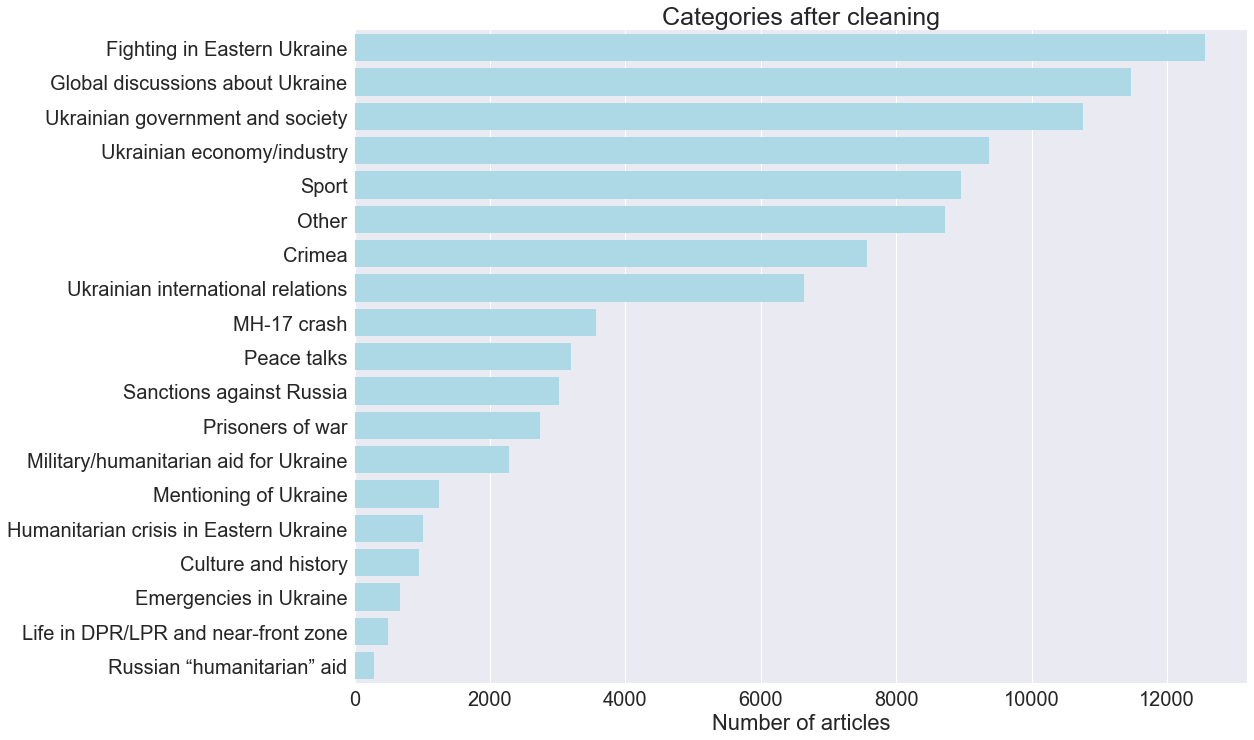

In [42]:
import seaborn as sns
topics = df['topic_name'].value_counts().head(24).to_frame()
topics = topics.reset_index()
topics.columns = ['topic', 'number_of_publications']
topics = topics[topics['topic'] != 'Not related to Ukraine']


topics['topic'] = [line.strip() for line in topics['topic']]
topics['topic'] = [line.decode('utf-8').strip() for line in topics['topic'] ]


plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = sns.barplot(x="number_of_publications", y="topic", color ='lightblue', data=topics, saturation=2)
ax.set_title('Categories after cleaning', fontsize = 25)
ax.set(xlabel='Number of articles', ylabel='')
plt.show()

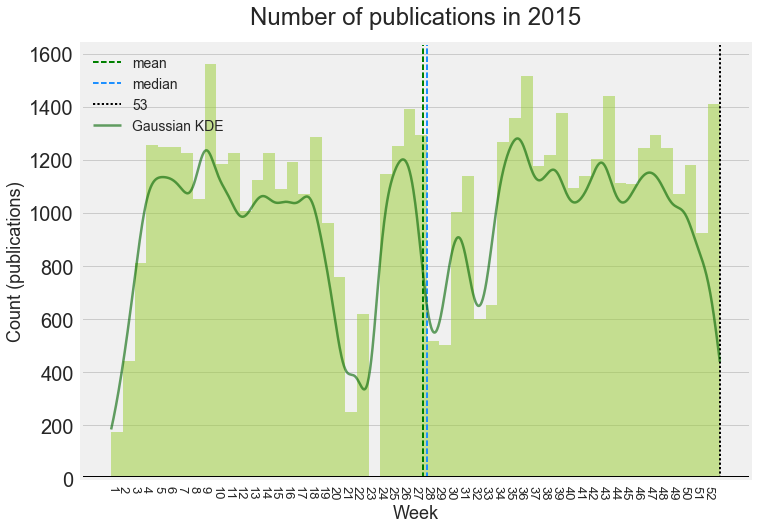

In [43]:
from scipy.stats import gaussian_kde
df_2015 = df[(df['year'] == 2015) & (df['topic_name'] != 'Not related to Ukraine')]

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

minweek = int(df_2015['week'].min())
maxweek = int(df_2015['week'].max())

df_hist = plt.hist(df_2015['week'], color = 'yellowgreen', alpha = 0.5, bins=maxweek-minweek)
plt.axvline(df_2015['week'].mean(), color='g', linestyle='dashed', linewidth =2, label = 'mean')
plt.axvline(df_2015['week'].median(), color='dodgerblue', linestyle='dashed', linewidth =2, label='median')

plt.axvline(maxweek, color='black', linestyle = ':', linewidth=2, label='53')
plt.axhline(0, color = 'black')
plt.title('Number of publications in 2015', fontsize = 24, y=1.03)

# y label
plt.ylabel('Count (publications)', fontsize = 18)
# plt.yticks(range(0, ) )

# x label
plt.xlabel('Week', fontsize = 18)
plt.xticks(range(1, maxweek, 1), fontsize = 13, rotation = -90)

density = gaussian_kde(df_2015.loc[df_2015['week'] <=53, 'week'])
xs = np.linspace(1, df_2015['week'].max(), 1000)
density.covariance_factor = lambda : 0.05
density._compute_covariance()
plt.plot(xs, density(xs)*100000/2, linewidth = 2.5, label = 'Gaussian KDE', color = 'darkgreen', alpha = 0.6)

plt.legend(loc = 'best', fontsize = 14)

plt.grid(which = 'major', axis = 'x')


plt.show()

 

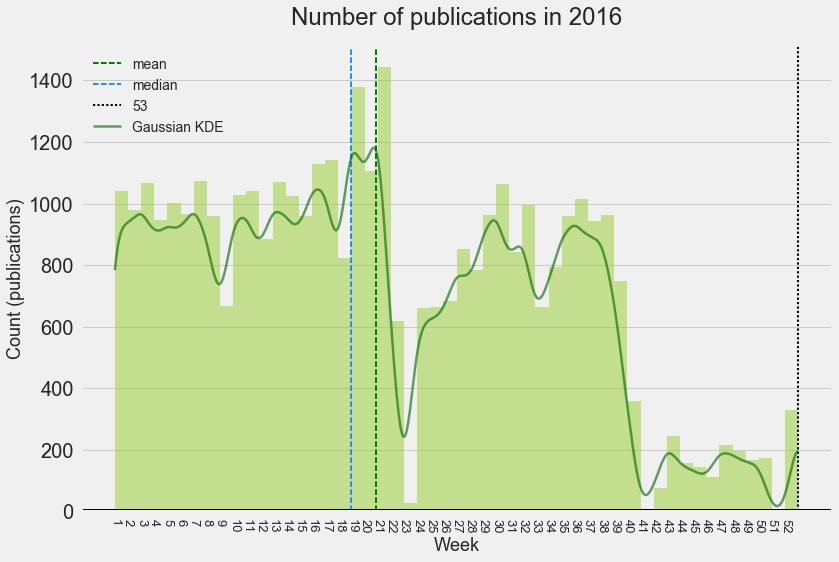

In [44]:
from scipy.stats import gaussian_kde
df_2016 = df[(df['year'] == 2016) & (df['topic_name'] != 'Not related to Ukraine')]

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

minweek = int(df_2016['week'].min())
maxweek = int(df_2016['week'].max())

df_hist = plt.hist(df_2016['week'], color = 'yellowgreen', alpha = 0.5, bins=maxweek-minweek)
plt.axvline(df_2016['week'].mean(), color='g', linestyle='dashed', linewidth =2, label = 'mean')
plt.axvline(df_2016['week'].median(), color='dodgerblue', linestyle='dashed', linewidth =2, label='median')

plt.axvline(maxweek, color='black', linestyle = ':', linewidth=2, label='53')
plt.axhline(0, color = 'black')
plt.title('Number of publications in 2016', fontsize = 24, y=1.03)

# y label
plt.ylabel('Count (publications)', fontsize = 18)

# x label
plt.xlabel('Week', fontsize = 18)
plt.xticks(range(1, maxweek, 1), fontsize = 13, rotation = -90)

density = gaussian_kde(df_2016.loc[df_2016['week'] <=53, 'week'])
xs = np.linspace(1, df_2016['week'].max(), 1000)
density.covariance_factor = lambda : 0.05
density._compute_covariance()
plt.plot(xs, density(xs)*100000/2.8, linewidth = 2.5, label = 'Gaussian KDE', color = 'darkgreen', alpha = 0.6)

plt.legend(loc = 'best', fontsize = 14)

plt.grid(which = 'major', axis = 'x')


plt.show()

There was no drastic drop in the number of publications in week 24 and 41 - the gap could be due to data cleaning or the articles were not processed and therefore not pulled from the database.

## Most popular articles (over 50000 fb likes and shares)

In [45]:
df[(df['impact_score'] >50000) & (df['topic_name']!= 'Not related to Ukraine')]\
[['title', 'topic_name', 'social_fb', 'publisher_url', 'pub_day']]

,title,topic_name,social_fb,publisher_url,pub_day
702,Victims of Malaysia Airlines Flight 17 - The N...,MH-17 crash,64379.0,nytimes.com,2014-07-20
3757,<b>crimea</b>,Crimea,805451.0,pinterest.com,2015-01-03
9829,Nuclear bomb used in <b>Donetsk</b> by the Ukr...,Fighting in Eastern Ukraine,496581.0,9gag.com,2015-02-08
9886,Did a Tactical Nuke Just Go Off in <b>Ukraine<...,Fighting in Eastern Ukraine,77088.0,redflagnews.com,2015-02-09
10134,Remains from the <b>MH17</b> plane crash arriv...,MH-17 crash,72589.0,unitedgamers.net63.net,2015-02-09
11876,Ukraine Crisis in Maps A visual guide to the c...,Fighting in Eastern Ukraine,40022.0,nytimes.com,2015-02-18
13067,OT: <b>MH17</b>,MH-17 crash,556561.0,futhead.com,2015-02-24
54461,Ukraine conflict - TIME,Fighting in Eastern Ukraine,86680.0,time.com,2015-08-18
58220,Two Children Paralyzed In First European Outbr...,Ukrainian government and society,99042.0,www.iflscience.com,2015-09-04
61073,SPORTS: Donetsk to Kamloops - WolfPack basketb...,Sport,74439.0,www.cfjctv.com,2015-09-17


## Media - headquarters city

In [46]:
df['hq_city'].value_counts().head(20)

Unknown             60538
Kyiv                12376
Moscow               8664
New York             4669
London               4638
Sunnyvale            1643
Washington, DC       1269
San Francisco         887
Prague                871
Mumbai                839
Sydney                528
Noida                 482
Toronto               467
Tehran                443
New Delhi             414
Washington, D.C.      384
Brussels              354
Singapore             345
Dubai                 337
Berlin                332
Name: hq_city, dtype: int64

More than half of publications don't show the name of the city where they have headquarters. From those where we know the headquarters - Kyiv is the biggest distributor of news about Ukraine, then we have Moscow, New York and London.

## Media - headquarters country

In [47]:
df['hq_country'].value_counts().head(20)

Unknown           60495
Ukraine           12528
USA               11246
Russia             8664
United Kingdom     4814
India              2093
Canada             1020
Czech Republic      871
Australia           702
Malaysia            501
Iran                443
France              410
Belgium             354
Singapore           345
UAE                 337
Germany             333
Belarus             296
Pakistan            289
Ireland             258
Lebanon             239
Name: hq_country, dtype: int64

Ukraine shows as the biggest distributor of news about itself, USA is second biggest (cities combined put it higher than in the previous chart ), then we have Russia, UK, India and Canada.

In about 2 years Ukraine produced over 12K articles about itself in English language. USA produced over 11K articles and Russia produced over 8K articles about Ukraine in English language.

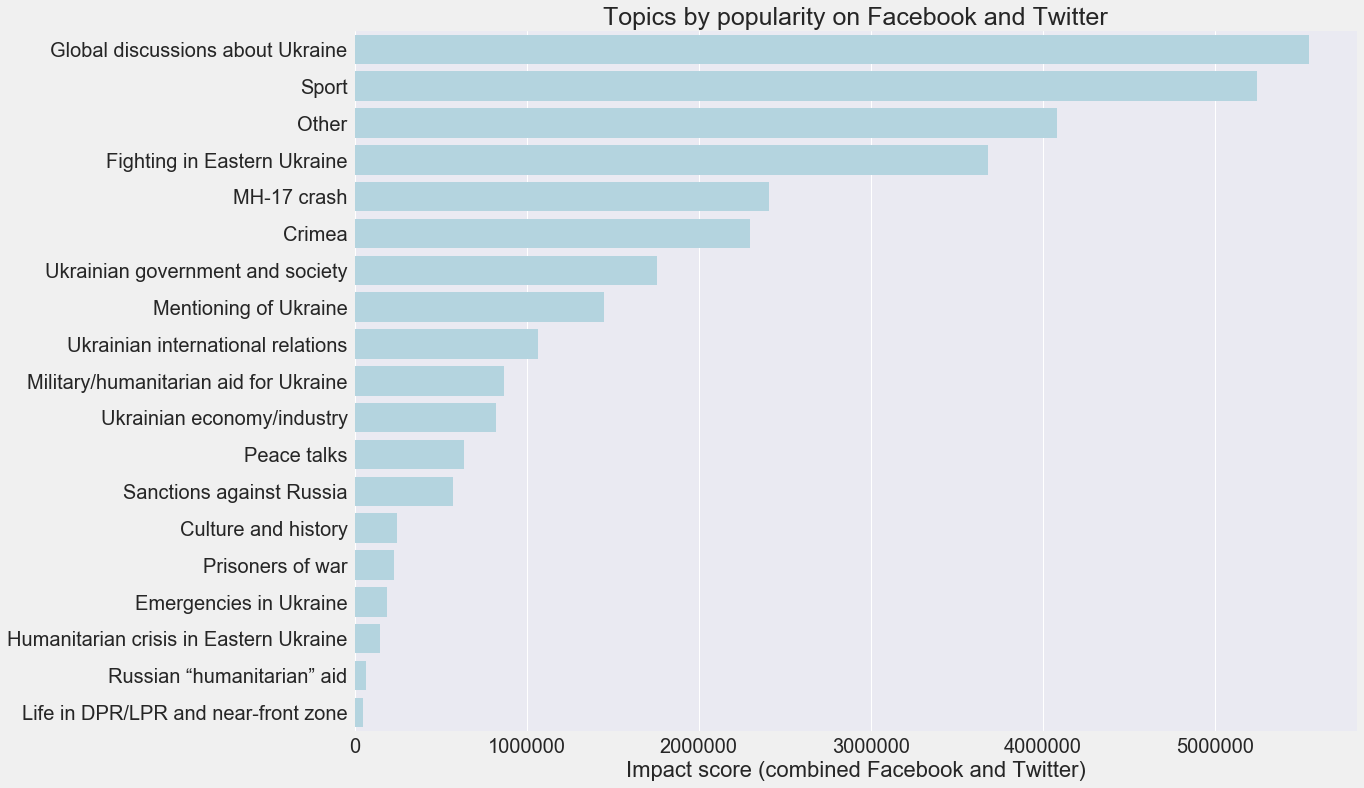

In [48]:
topics_social = pd.pivot_table(df, index=['topic_name'], values=['impact_score'], aggfunc =sum)
topics_social.index.name = None
topics_social = topics_social.reset_index()
topics_social.columns = ['topic', 'impact_score']
topics_social = topics_social[topics_social['topic'] != 'Not related to Ukraine']
topics_social.sort_values(['impact_score'], ascending=False, inplace =True)
topics_social['topic'] = [line.decode('utf-8').strip() for line in topics_social['topic']  ]


plt.figure(figsize=(16,12))
sns.set_style('whitegrid')
sns.set(font_scale=2)
ax = sns.barplot(x ='impact_score', y ='topic', color = 'lightblue', data=topics_social)


ax.set_title('Topics by popularity on Facebook and Twitter', fontsize = 25)
ax.set(xlabel='Impact score (combined Facebook and Twitter)', ylabel='')

plt.show()

Now we are looking at most popular categories - but according to Facebook and Twitter. The score here is combined likes and shares on Facebook and Twitter.

These are the topics people react to.

'Global discussions about Ukraine' is rather general topic that means that the article probably didn't have one topic
and was broadly talking about situation/event in Ukraine.

First and second place broken almost evenly between 'Global discussions' and "Sport' which looks like serious news and sport are equaly important for people.

This is a different picture from what we've seen above - the majority of articles there are about Ukraine talk about its situation in the east, government and economy, but articles with general discussions and sport get more reaction from the public.

In [49]:
df['year'].value_counts()

2015    64921
2016    40736
2014     2817
Name: year, dtype: int64

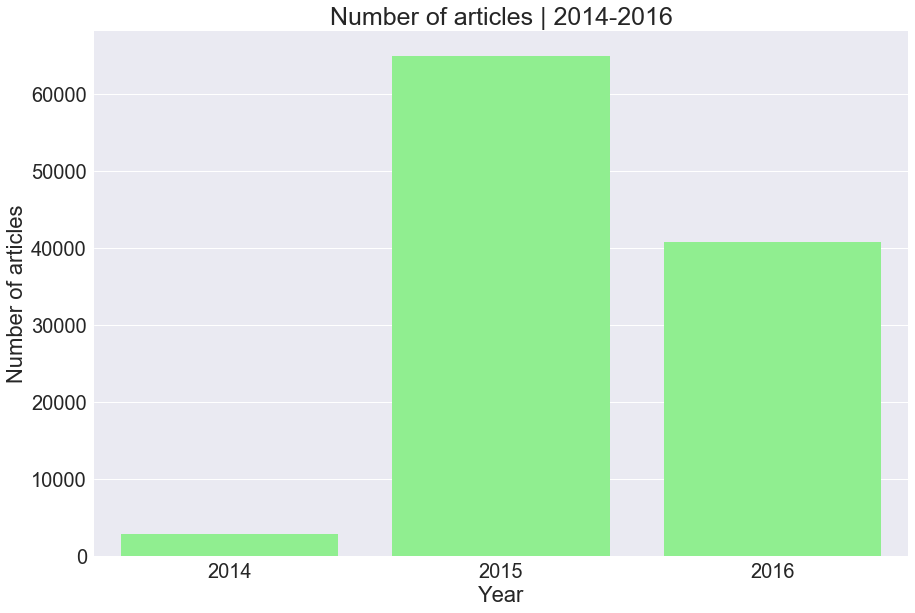

In [50]:
import seaborn as sns
years = df['year'].value_counts().to_frame()
years = years.reset_index()
years.columns = ['year', 'n_articles']
years

plt.figure(figsize=(13,9))
sns.set_style('whitegrid')
sns.set(font_scale=2)
ax = sns.barplot(y='n_articles', x='year', color ='lightgreen', data=years, saturation=2)
ax.set_title('Number of articles | 2014-2016', fontsize=25)
ax.set(ylabel='Number of articles', xlabel='Year')
plt.show()


Looking at a number of articles produced about Ukraine over the years shows that there’s a significant drop in 2016 comparing with 2015 (small number of articles in 2014 is due to the project starting in November 2014)

In [51]:
# Media with headquarters in Sunnyvale writing about Ukraine
sunnyvale = df[df['hq_city']=='Sunnyvale']
sunnyvale['topic_name'].value_counts()

Fighting in Eastern Ukraine               264
Not related to Ukraine                    210
Ukrainian government and society          186
Sport                                     154
Global discussions about Ukraine          137
Ukrainian economy/industry                117
Peace talks                                97
Other                                      94
Crimea                                     90
Ukrainian international relations          81
Prisoners of war                           66
Sanctions against Russia                   58
Military/humanitarian aid for Ukraine      26
Humanitarian crisis in Eastern Ukraine     18
MH-17 crash                                17
Emergencies in Ukraine                     13
Mentioning of Ukraine                       8
Life in DPR/LPR and near-front zone         4
Russian “humanitarian” aid                  2
Culture and history                         1
Name: topic_name, dtype: int64

In [52]:
df[df['hq_country']=='Singapore'].head(10)

,title,author,publisher_url,pub_week,pub_day,pub_month,social_fb,social_tw,impact_score,topic_name,hq_city,hq_country,is_ukr_press,editor,year,month,week,date
1441,Fears rise as Russian military units pour into...,NaN,todayonline.com,2014-45,2014-11-14,2014-11,3.0,2,5.0,Emergencies in Ukraine,Singapore,Singapore,0,lana.roxolana,2014,11.0,46.0,14.0
1449,British PM Cameron says Russia sanctions could...,NaN,todayonline.com,2014-45,2014-11-14,2014-11,2.0,1,3.0,Sanctions against Russia,Singapore,Singapore,0,mariana.getman,2014,11.0,46.0,14.0
1459,<b>Ukraine</b> rebels hinder border monitors a...,NaN,todayonline.com,2014-45,2014-11-14,2014-11,0.0,0,0.0,Fighting in Eastern Ukraine,Singapore,Singapore,0,oksana.izb,2014,11.0,46.0,14.0
1460,<b>Ukraine&#39;s</b> main task is to build arm...,NaN,todayonline.com,2014-45,2014-11-14,2014-11,0.0,0,0.0,Fighting in Eastern Ukraine,Singapore,Singapore,0,lana.roxolana,2014,11.0,46.0,14.0
3319,Ukraine secures cheap Russian coal and power s...,NaN,channelnewsasia.com,2014-51,2014-12-27,2014-12,8.0,16,24.0,Ukrainian economy/industry,Singapore,Singapore,0,oksana.izb,2014,12.0,52.0,27.0
3697,Ukraine reports first military death of 2015 i...,NaN,straitstimes.com,2015-00,2015-01-02,2015-01,0.0,13,13.0,Fighting in Eastern Ukraine,Singapore,Singapore,0,lyuba,2015,1.0,1.0,2.0
4309,Eight killed in Ukraine as peace talk prospect...,NaN,channelnewsasia.com,2015-01,2015-01-09,2015-01,2.0,16,18.0,Fighting in Eastern Ukraine,Singapore,Singapore,0,vladimyr.lvr,2015,1.0,2.0,9.0
4469,Why Asia is the key to the Russia-<b>Ukraine</...,NaN,straitstimes.com,2015-02,2015-01-12,2015-01,99.0,25,124.0,Peace talks,Singapore,Singapore,0,trkostyk,2015,1.0,3.0,12.0
4710,Ten Ukrainian civilians killed when rocket hit...,NaN,channelnewsasia.com,2015-02,2015-01-13,2015-01,1.0,12,13.0,Fighting in Eastern Ukraine,Singapore,Singapore,0,gekkarp,2015,1.0,3.0,13.0
5417,<b>Ukraine</b> sends tanks to fight rebels in ...,NaN,channelnewsasia.com,2015-03,2015-01-18,2015-01,3.0,12,15.0,Fighting in Eastern Ukraine,Singapore,Singapore,0,Tonia.Keefer,2015,1.0,3.0,18.0


## Media outlets

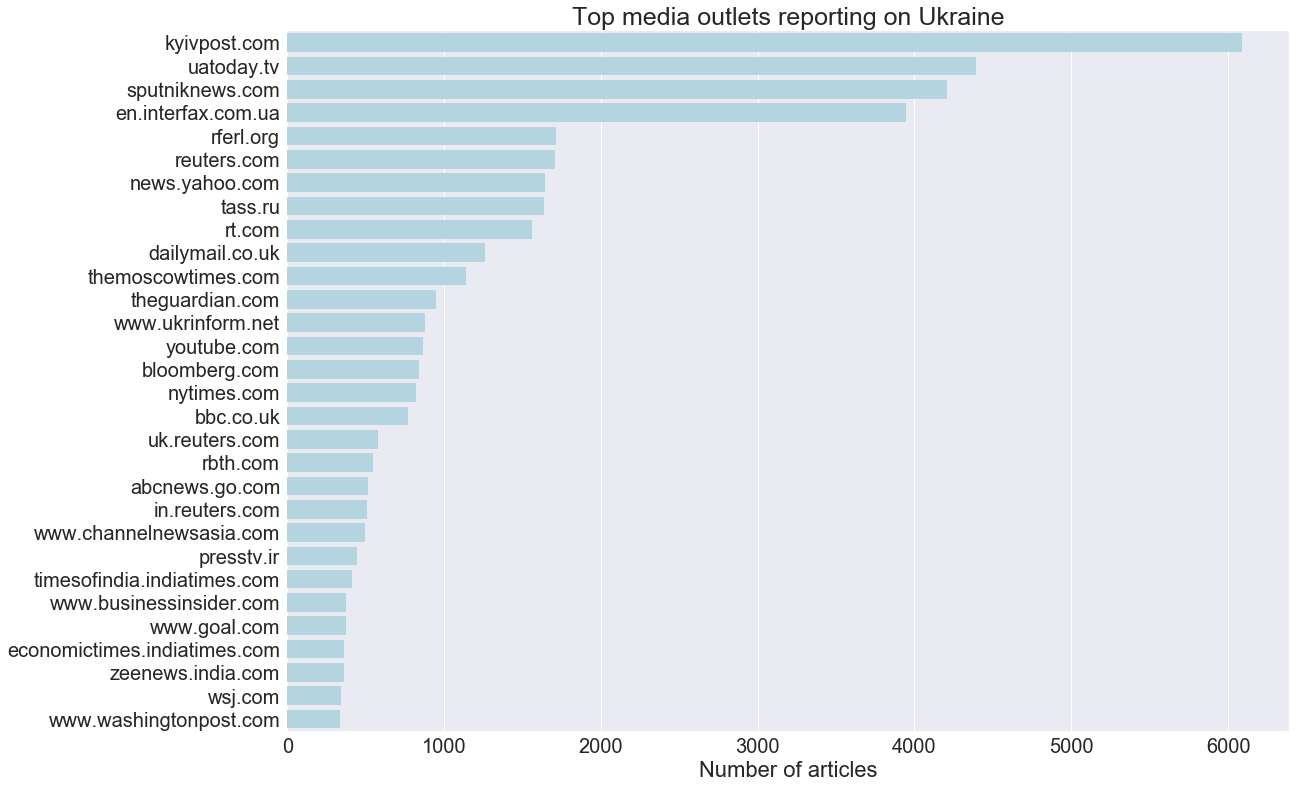

In [53]:
top_publ = df['publisher_url'].value_counts().head(30).to_frame()
top_publ =top_publ.reset_index()
top_publ.columns = ['media', 'number_articles']

plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = sns.barplot(x="number_articles", y="media", color ='lightblue', data=top_publ)
ax.set_title('Top media outlets reporting on Ukraine', fontsize = 25)
ax.set(xlabel='Number of articles', ylabel='')
plt.show()

# Encoding

In [54]:
df['title'] =  df['title'].astype(str)

In [55]:
df['title'] = df['title'].apply(lambda x: x.decode('unicode_escape').\
                                          encode('ascii', 'ignore').\
                                          strip())

In [56]:
from langdetect import detect
from langdetect import detect_langs
detect_langs("Otec matka syn.")

[fi:0.571426519512, pl:0.428570298106]

In [57]:
myList = []
for element in df['title']:
    try:
        if detect(element) == "en":
            myList.append('English')
        else:
            myList.append('Some Other Language')
    except:
        myList.append("Error")
        

len(myList)

108474

In [58]:
df['conv_title'] = myList

In [ ]:
df['conv_title'].value_counts()

In [ ]:
df = df[df['conv_title'] == 'English']

In [ ]:
# df.to_csv('features_df.csv', encoding='utf-8', index=False)
df = pd.read_csv('features_df.csv')